In [1]:
# Import the necessary libraries.h
import pandas as pd 
import numpy as np
from scipy import stats
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from scipy.spatial import transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
marketing_analysis = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
marketing_analysis

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
df_cont_cols =  marketing_analysis.drop(['Customer','Number of Policies','Number of Open Complaints'], axis=1)
df_cont_cols = df_cont_cols.select_dtypes(include=["float64", "int64"])

In [4]:
# We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.




# import seaborn as sns

# def plot_boxplots(data):
#     sns.set(style="whitegrid")
#     for column in data.columns:
#         if data[column].dtype != "object":
#             ax = sns.boxplot(data[column])
#             ax.set_title(f"Box Plot of {column}")
#             ax.set_xlabel(column)
#             ax.set_ylabel("Value")
#             plt.show()

# plot_boxplots(marketing_analysis_copy)

In [5]:
import pandas as pd

def remove_outliers_iqr(df, columns, multiplier=1.5):
    """
    Removes outliers from a dataframe by column using the IQR method.
    
    Args:
        df (pd.DataFrame): The input dataframe.
        columns (list): A list of column names to remove outliers from.
        multiplier (float): The IQR multiplier used to determine outliers.
            Default is 1.5.
    
    Returns:
        pd.DataFrame: A new dataframe with the outliers removed.
    """
    df_out = df.copy()
    for column in columns:
        Q1 = df_out[column].quantile(0.25)
        Q3 = df_out[column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + multiplier * IQR
        lower_bound = Q1 - multiplier * IQR
        df_out = df_out[(df_out[column] >= lower_bound) & (df_out[column] <= upper_bound)]
    return df_out



In [6]:
column_names = list(df_cont_cols.columns)
print(column_names)

['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Total Claim Amount']


In [7]:
marketing_analysis_copy =remove_outliers_iqr(marketing_analysis,column_names,multiplier=1.5)
marketing_analysis_copy

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [8]:
# Normalize the continuous variables. You can use any one method you want.
df_continuas =  marketing_analysis_copy.drop(['Customer','Number of Policies',
                                              'Number of Open Complaints','Income','Months Since Last Claim',
                                             'Months Since Policy Inception'], axis=1)
df_continuas = df_continuas.select_dtypes(include=["float64", "int64"])
df_continuas_negativas =  marketing_analysis_copy.drop(['Customer','Number of Policies','Number of Open Complaints'], axis=1)
df_continuas_negativas = df_continuas_negativas.select_dtypes(include=["float64", "int64"])
df_continuas_negativas = df_continuas_negativas[['Income','Months Since Last Claim','Months Since Policy Inception']]
df_continuas_negativas

,Income,Months Since Last Claim,Months Since Policy Inception
0,56274,32,5
2,48767,18,38
3,0,18,65
4,43836,12,44
5,62902,14,94
...,...,...,...
9128,47761,16,58
9130,21604,14,28
9131,0,9,37
9132,21941,34,3


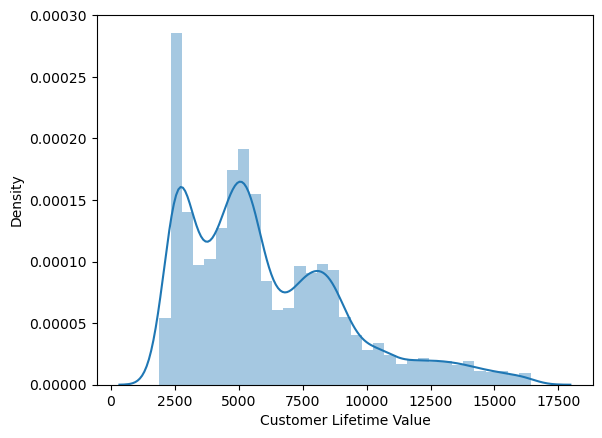

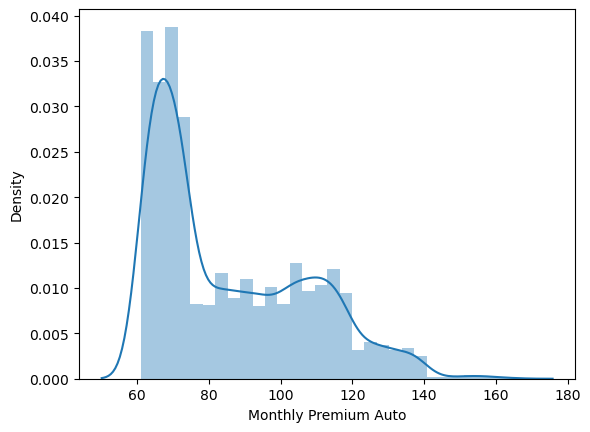

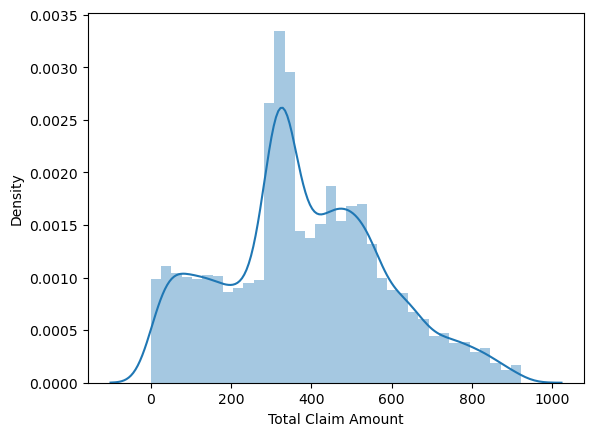

In [9]:
for i in range(len(df_continuas.columns)):
    sns.distplot( df_continuas.iloc[:,i])
    plt.show()

In [10]:
#Transformacion log normal
def transform_to_normal(dataframe, column_name):
    transformed_data = np.log(dataframe[column_name])
    transformed_data = transformed_data.dropna()
    
    return transformed_data

columns = list(df_continuas.columns)
df2 = pd.DataFrame()

for column in columns:
    transformed_data = transform_to_normal(df_continuas, column)
    df2[column] = transformed_data

print(df2)

      Customer Lifetime Value  Monthly Premium Auto  Total Claim Amount
0                    7.924260              4.234107            5.952753
2                    9.464008              4.682131            6.339428
3                    8.941920              4.663439            6.272653
4                    7.942253              4.290459            4.928202
5                    9.018732              4.234107            5.071310
...                       ...                   ...                 ...
9128                 8.318839              4.644391            6.293940
9130                 8.038031              4.369448            5.938064
9131                 9.007476              4.442651            6.673026
9132                 8.925912              4.564348            6.538429
9133                 7.867809              4.343805            5.912421

[7789 rows x 3 columns]


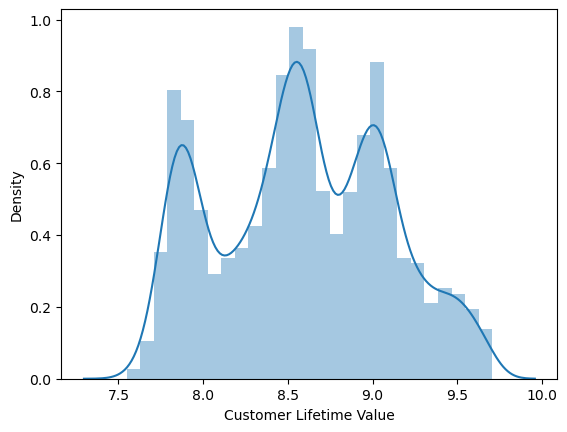

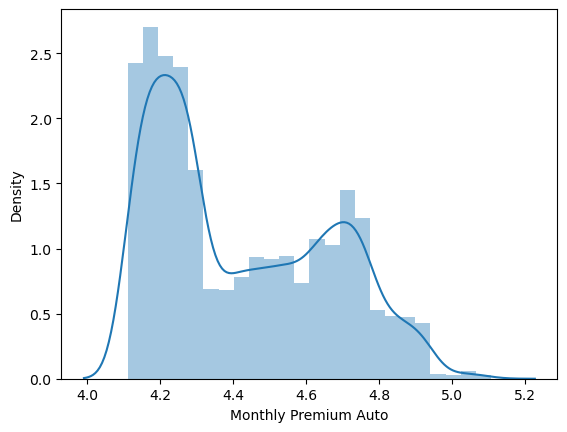

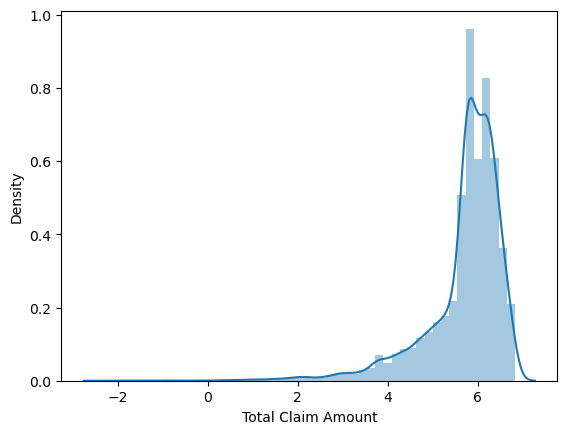

In [11]:
copy_normalized = df2

for i in range(len(copy_normalized.columns)):
    sns.distplot( copy_normalized.iloc[:,i])
    plt.show()

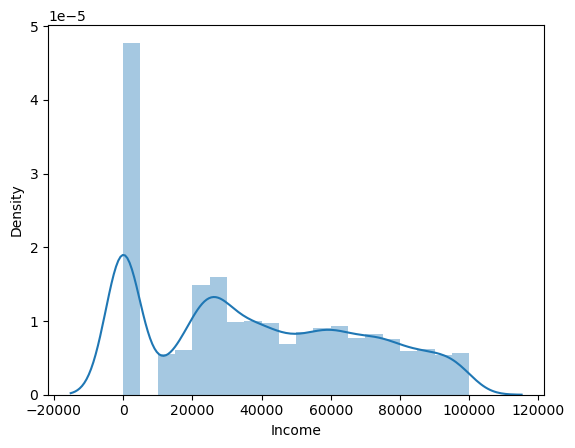

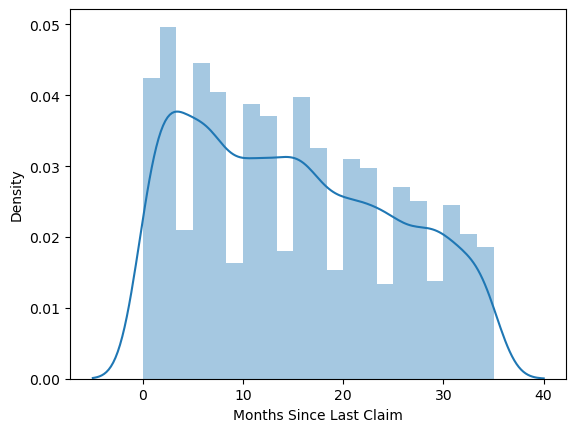

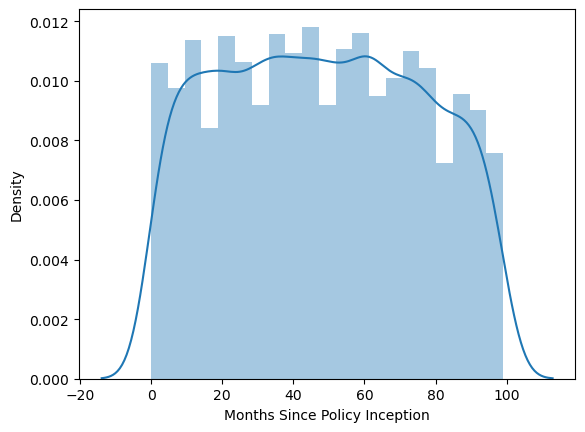

In [12]:
for i in range(len(df_continuas_negativas.columns)):
    sns.distplot( df_continuas_negativas.iloc[:,i])
    plt.show()

In [13]:
#transformation to uniform distribution 
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
scaler.fit(df_continuas_negativas)

# transform the data using the scaler
df_normalized = pd.DataFrame(scaler.transform(df_continuas_negativas), columns=df_continuas_negativas.columns)

print(df_normalized)

        Income  Months Since Last Claim  Months Since Policy Inception
0     0.482130                 1.575613                      -1.602210
1     0.316754                 0.309743                      -0.260089
2    -5.199338                 0.309743                       0.493553
3     0.214820                -0.158740                      -0.096753
4     0.673702                -0.002509                       1.761948
...        ...                      ...                            ...
7784  0.296607                 0.158740                       0.274391
7785 -0.469603                -0.002509                      -0.558392
7786 -5.199338                -0.403356                      -0.290058
7787 -0.456252                 2.004234                      -1.824556
7788 -5.199338                -1.118711                       1.453280

[7789 rows x 3 columns]


In [14]:
copy_normalized
copy_normalized = copy_normalized.reset_index(drop=True)

In [15]:
# concatenar los valores

numerical_normal_3 = pd.concat([copy_normalized,df_normalized], axis=1)
numerical_normal_3

,Customer Lifetime Value,Monthly Premium Auto,Total Claim Amount,Income,Months Since Last Claim,Months Since Policy Inception
0,7.924260,4.234107,5.952753,0.482130,1.575613,-1.602210
1,9.464008,4.682131,6.339428,0.316754,0.309743,-0.260089
2,8.941920,4.663439,6.272653,-5.199338,0.309743,0.493553
3,7.942253,4.290459,4.928202,0.214820,-0.158740,-0.096753
4,9.018732,4.234107,5.071310,0.673702,-0.002509,1.761948
...,...,...,...,...,...,...
7784,8.318839,4.644391,6.293940,0.296607,0.158740,0.274391
7785,8.038031,4.369448,5.938064,-0.469603,-0.002509,-0.558392
7786,9.007476,4.442651,6.673026,-5.199338,-0.403356,-0.290058
7787,8.925912,4.564348,6.538429,-0.456252,2.004234,-1.824556


In [16]:
# Encode the categorical variables
# 23 columnas


X_num = marketing_analysis_copy[['Number of Policies','Number of Open Complaints']]


In [17]:
df_cat = marketing_analysis_copy.select_dtypes(include=["object"])
df_cat = df_cat.drop(['Customer'], axis=1)


In [18]:
df_cat = pd.concat([X_num,df_cat], axis=1)
df_cat

,Number of Policies,Number of Open Complaints,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,1,0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,2,0,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,7,0,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,1,0,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,2,0,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,1,0,California,No,Premium,College,1/6/11,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9130,1,0,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,2,3,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,3,0,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [19]:
df_cat = df_cat.reset_index(drop=True)
df_cat

,Number of Policies,Number of Open Complaints,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,1,0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,2,0,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
2,7,0,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
3,1,0,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
4,2,0,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,1,0,California,No,Premium,College,1/6/11,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
7785,1,0,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
7786,2,3,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
7787,3,0,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [20]:
from sklearn import preprocessing

df_cat = df_cat.apply(preprocessing.LabelEncoder().fit_transform)
df_cat 

,Number of Policies,Number of Open Complaints,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,0,0,4,0,0,0,47,1,0,1,1,0,2,0,0,3,1
1,1,0,2,0,2,0,41,1,0,1,1,1,5,0,0,3,1
2,6,0,1,0,0,0,12,4,1,1,1,0,1,0,2,1,1
3,0,0,4,0,0,0,52,1,1,0,2,1,3,0,0,0,1
4,1,0,3,1,0,0,17,1,0,0,1,1,5,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,0,0,1,0,2,1,27,1,0,1,2,1,4,0,1,0,0
7785,0,0,1,1,1,1,34,1,0,1,0,0,2,0,1,0,1
7786,1,3,1,0,1,0,55,4,1,1,2,0,1,0,1,0,1
7787,2,0,1,0,1,1,52,1,1,1,1,1,4,2,1,0,0


In [21]:
# The time variable can be useful. 
# Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
df_Date = marketing_analysis_copy['Effective To Date']
df_Date



0       2/24/11
2       2/19/11
3       1/20/11
4        2/3/11
5       1/25/11
         ...   
9128     1/6/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: Effective To Date, Length: 7789, dtype: object

In [22]:
# Convert the "Effective To Date" column to datetime format
marketing_analysis_copy['Effective To Date'] = pd.to_datetime(marketing_analysis_copy['Effective To Date'])

# Extract day of the week as an integer (Monday=0, Sunday=6)
marketing_analysis_copy['DayOfWeek'] = marketing_analysis_copy['Effective To Date'].dt.dayofweek

# Extract week of the year as an integer
marketing_analysis_copy['WeekOfYear'] = marketing_analysis_copy['Effective To Date'].dt.isocalendar().week

# Extract month as an integer
marketing_analysis_copy['Month'] = marketing_analysis_copy['Effective To Date'].dt.month

# Print the transformed dataframe
print(marketing_analysis_copy)

     Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
5     OC83172      Oregon              8256.297800      Yes     Basic   
...       ...         ...                      ...      ...       ...   
9128  YM19146  California              4100.398533       No   Premium   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor        2011-02-24         Employed 

In [23]:
df_Dates = marketing_analysis_copy[['DayOfWeek','WeekOfYear','Month']]

In [24]:
df_Dates = df_Dates.reset_index(drop=True)
df_Dates

,DayOfWeek,WeekOfYear,Month
0,3,8,2
1,5,7,2
2,3,3,1
3,3,5,2
4,1,4,1
...,...,...,...
7784,3,1,1
7785,5,6,2
7786,6,5,2
7787,3,5,2


In [25]:
data_final = pd.concat([numerical_normal_3,df_cat,df_Dates], axis=1)
data_final

,Customer Lifetime Value,Monthly Premium Auto,Total Claim Amount,Income,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Number of Open Complaints,State,Response,...,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,DayOfWeek,WeekOfYear,Month
0,7.924260,4.234107,5.952753,0.482130,1.575613,-1.602210,0,0,4,0,...,1,0,2,0,0,3,1,3,8,2
1,9.464008,4.682131,6.339428,0.316754,0.309743,-0.260089,1,0,2,0,...,1,1,5,0,0,3,1,5,7,2
2,8.941920,4.663439,6.272653,-5.199338,0.309743,0.493553,6,0,1,0,...,1,0,1,0,2,1,1,3,3,1
3,7.942253,4.290459,4.928202,0.214820,-0.158740,-0.096753,0,0,4,0,...,2,1,3,0,0,0,1,3,5,2
4,9.018732,4.234107,5.071310,0.673702,-0.002509,1.761948,1,0,3,1,...,1,1,5,1,3,3,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,8.318839,4.644391,6.293940,0.296607,0.158740,0.274391,0,0,1,0,...,2,1,4,0,1,0,0,3,1,1
7785,8.038031,4.369448,5.938064,-0.469603,-0.002509,-0.558392,0,0,1,1,...,0,0,2,0,1,0,1,5,6,2
7786,9.007476,4.442651,6.673026,-5.199338,-0.403356,-0.290058,1,3,1,0,...,2,0,1,0,1,0,1,6,5,2
7787,8.925912,4.564348,6.538429,-0.456252,2.004234,-1.824556,2,0,1,0,...,1,1,4,2,1,0,0,3,5,2


In [26]:
# Since the model will only accept numerical data,
# check and make sure that every column is numerical, if some are not, change it using encoding.
data_final.dtypes

Customer Lifetime Value          float64
Monthly Premium Auto             float64
Total Claim Amount               float64
Income                           float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Number of Policies                 int64
Number of Open Complaints          int64
State                              int32
Response                           int32
Coverage                           int32
Education                          int32
Effective To Date                  int32
EmploymentStatus                   int32
Gender                             int32
Location Code                      int32
Marital Status                     int32
Policy Type                        int32
Policy                             int32
Renew Offer Type                   int32
Sales Channel                      int32
Vehicle Class                      int32
Vehicle Size                       int32
DayOfWeek                          int64
WeekOfYear      

# LAB 4.05

In [27]:
# In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
# Try a simple linear regression with all the data to see whether we are getting good results.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define the features and target variable
X = data_final.drop(['Total Claim Amount'], axis=1)
y = data_final['Total Claim Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a simple linear regression model using all the data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Print the R-squared score on the training and testing sets
print(f"Training set R-squared score: {lr.score(X_train, y_train):.3f}")
print(f"Testing set R-squared score: {lr.score(X_test, y_test):.3f}")

Training set R-squared score: 0.441
Testing set R-squared score: 0.437


In [28]:
# Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

def test_models(models, X, y, test_size=0.2, random_state=42):
    """
    Trains and tests a list of models on the input data (X, y).

    Args:
    - models (list of tuples): A list of tuples containing the model name and the model object.
    - X (pandas DataFrame): The features data.
    - y (pandas Series): The target data.
    - test_size (float, optional): The proportion of the data to use for testing. Defaults to 0.2.
    - random_state (int, optional): The random seed to use for reproducibility. Defaults to 42.

    Returns:
    - A dictionary with the model name as key and the R-squared score on the testing set as value.
    """

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train and test the models
    scores = {}
    for name, model in models:
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        scores[name] = score

    return scores

In [29]:
# Use the function to check LinearRegressor and KNeighborsRegressor.
X = data_final.drop(['Total Claim Amount'], axis=1)
y = data_final['Total Claim Amount']

# Define the models to test
models = [
    ('LinearRegression', LinearRegression()),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('MLPRegressor', MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam'))
]

# Test the models and print the results
results = test_models(models, X, y)
for name, score in results.items():
    print(f"{name}: {score:.3f}")

LinearRegression: 0.437
KNeighborsRegressor: 0.101
MLPRegressor: 0.711


In [ ]:
# You can check also the MLPRegressor for this task!


In [ ]:
# Check and discuss the results.

# MLPRegressor was the best R in the test.